# Navigation Task

In [1]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som_position import ManagerSOMPosition, ManagerSOMPositionAllNeighbor
from custom_env.navigation_task import NavigationTask
%matplotlib inline

path exception


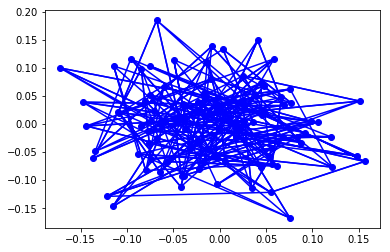

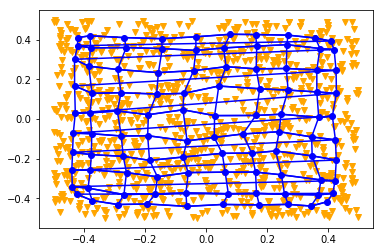

tensor([[-0.4215,  0.4111],
        [-0.3806,  0.4198],
        [-0.2690,  0.4109],
        [-0.1464,  0.4055],
        [-0.0337,  0.4149],
        [ 0.0791,  0.4276],
        [ 0.1622,  0.4262],
        [ 0.2689,  0.4232],
        [ 0.3585,  0.4089],
        [ 0.4087,  0.3934],
        [-0.4216,  0.3700],
        [-0.3794,  0.3592],
        [-0.2624,  0.3606],
        [-0.1441,  0.3554],
        [-0.0336,  0.3463],
        [ 0.0573,  0.3587],
        [ 0.1662,  0.3679],
        [ 0.2648,  0.3750],
        [ 0.3734,  0.3559],
        [ 0.4200,  0.3505],
        [-0.4319,  0.3014],
        [-0.3852,  0.2665],
        [-0.2907,  0.2500],
        [-0.1566,  0.2343],
        [-0.0412,  0.2443],
        [ 0.0655,  0.2642],
        [ 0.1641,  0.2533],
        [ 0.2630,  0.2551],
        [ 0.3632,  0.2483],
        [ 0.4265,  0.2452],
        [-0.4316,  0.1674],
        [-0.3746,  0.1300],
        [-0.2791,  0.1331],
        [-0.1627,  0.1263],
        [-0.0733,  0.1295],
        [ 0.0415,  0

In [2]:
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

## Manager Self Organizing Map

/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return torch.max(self.w[self.select_winner(x)][-self.worker_som.total_nodes:])[0]


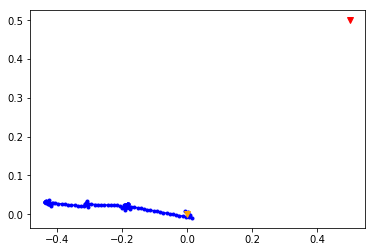

0 0.4599388814164649


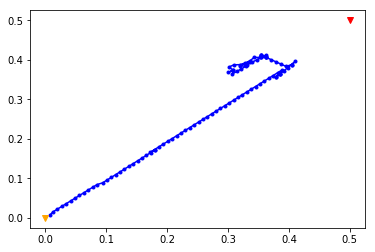

99 7.228538701580415


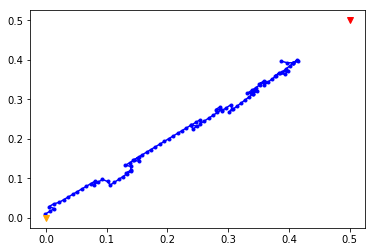

198 5.262435210489968


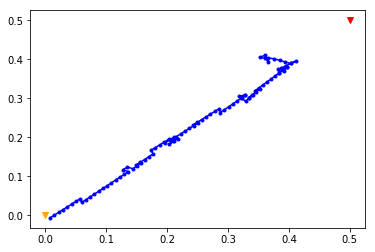

297 4.8443877254240535


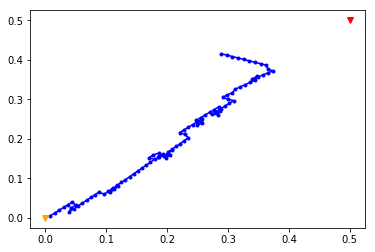

396 4.123596051538969


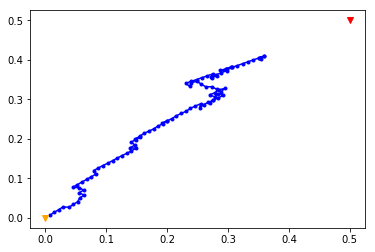

495 6.396788269814445


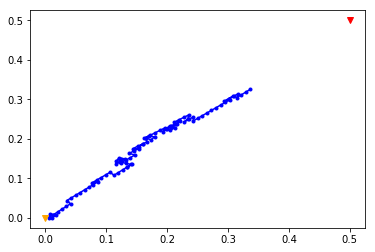

594 4.309151493500466


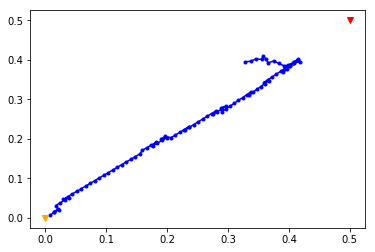

693 5.753111136400265


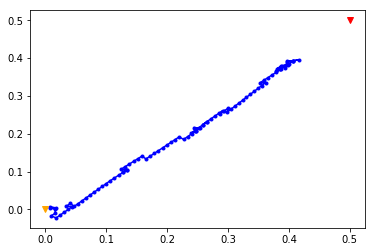

792 1.1956427335002147


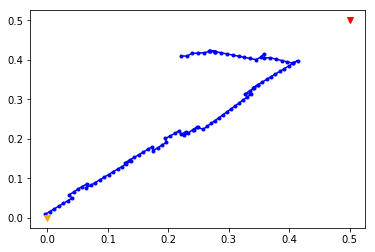

891 6.071527689448831


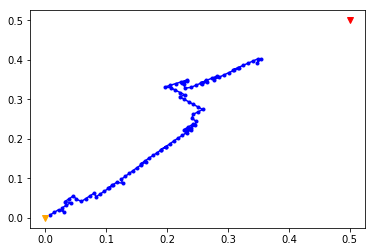

990 4.23141524709168


In [3]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTask()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
        plt.show()
        print(epoch, total_return)
    
    task.reset()

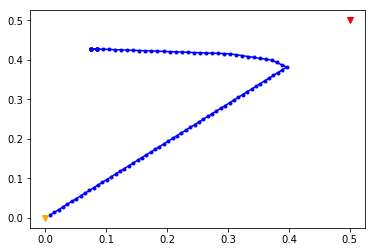

7.621891761429252


In [4]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()

/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return torch.max(self.w[self.select_winner(x)][-self.worker_som.total_nodes:])[0]


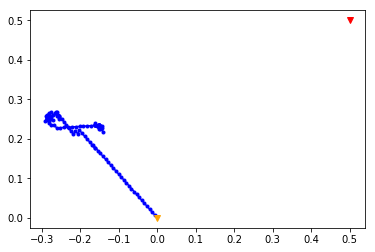

0 5.950516826485996


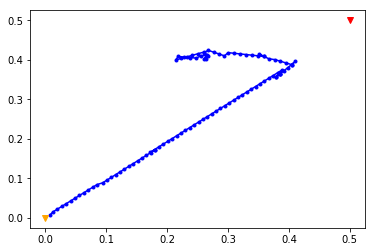

99 7.229799755712309


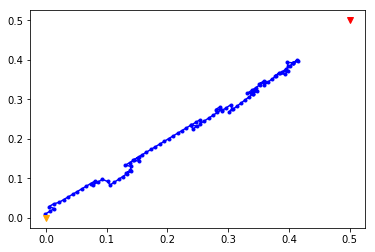

198 5.278839082030406


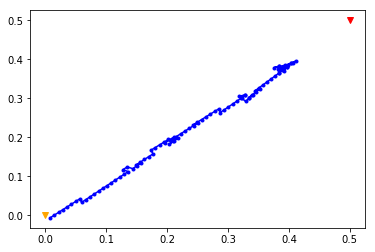

297 4.863371734874703


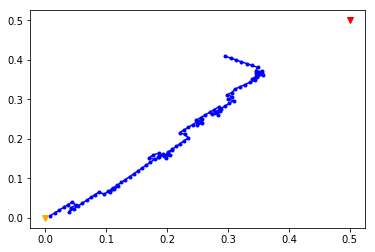

396 4.123519769502162


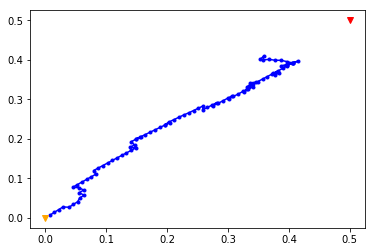

495 6.408527915443601


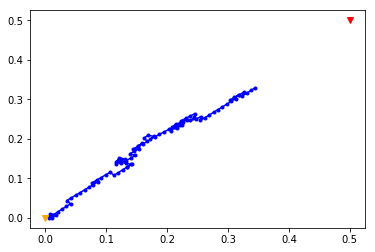

594 4.307359872956099


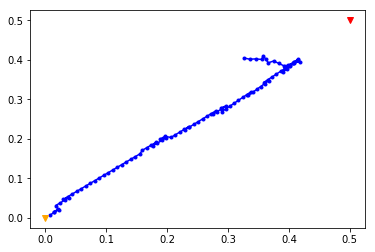

693 5.754513679454153


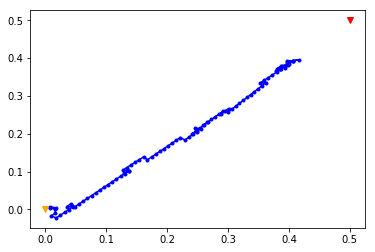

792 1.2386581380847506


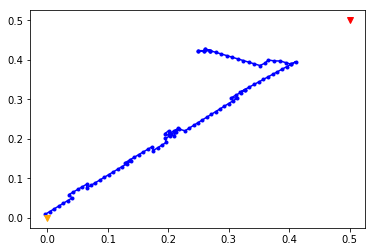

891 6.117663620418149


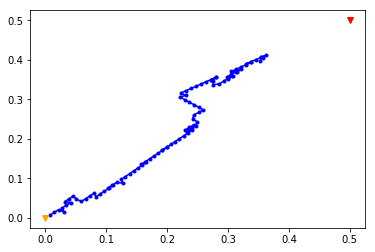

990 4.237092118979588


In [5]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPositionAllNeighbor(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTask()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
        plt.show()
        print(epoch, total_return)
    
    task.reset()

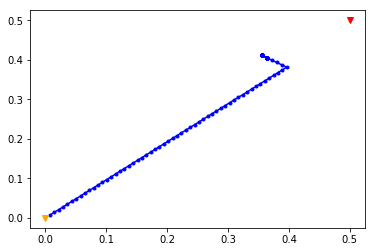

7.616780193942513


In [6]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()